# Capstone Project - Customer Persona Generator
_Author: Chi-Yuan (Tina) Peng_

_Date: Dec. 2022_

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Load Data

In [4]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,has_child,num_family_member,single_parent,total_spent,PrWines,PrFruits,PrMeatProducts,PrFishProducts,PrSweetProducts,PrGoldProds
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
1,46344.0,38,11,1,6,2,1,6,2,1,...,1,2,1,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
2,58293.0,94,173,43,118,46,27,15,5,5,...,1,2,0,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545
3,62513.0,16,520,42,98,0,42,14,2,6,...,1,2,0,716,0.726257,0.058659,0.136872,0.000000,0.058659,0.019553
4,55635.0,34,235,65,164,50,49,27,4,7,...,1,1,1,590,0.398305,0.110169,0.277966,0.084746,0.083051,0.045763


## Feature Engineering

In [5]:
sc = StandardScaler()
Z_df = sc.fit_transform(df)

## Modeling - KMeans Clustering

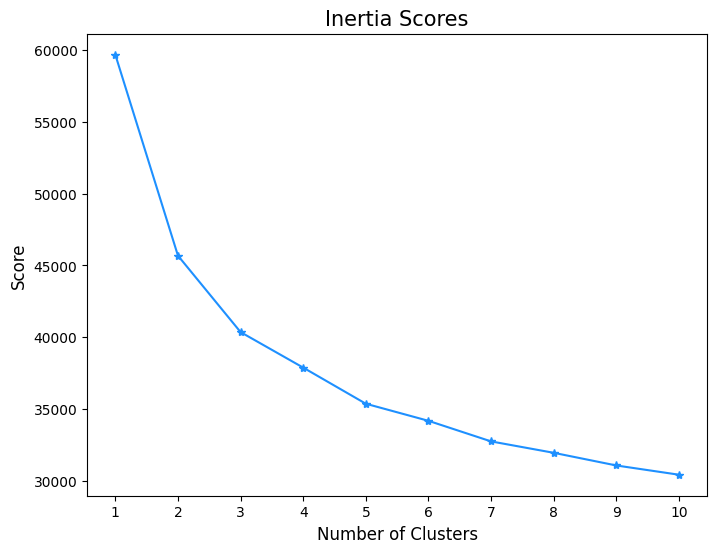

In [6]:
inertia_ly = []

for k in range(1, 11):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(Z_df)
    inertia_ly.append(km.inertia_)
    
plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), inertia_ly, marker = '*', color = 'dodgerblue')
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.xticks(range(1, 11))
plt.title('Inertia Scores', fontsize = 15);

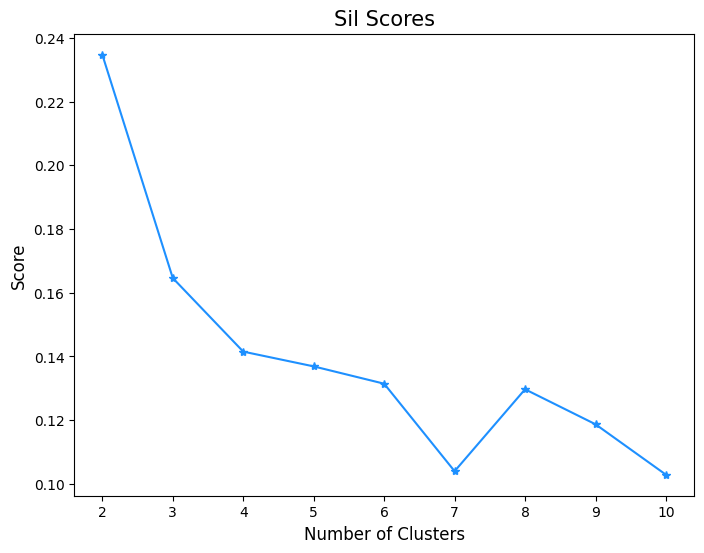

In [7]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(Z_df)
    labels = kmeans.labels_
    sil.append(silhouette_score(Z_df, labels, metric = 'euclidean'))
    
plt.figure(figsize = (8, 6))
plt.plot(range(2, 11), sil, marker = '*', color = 'dodgerblue')
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.xticks(range(2, 11))
plt.title('Sil Scores', fontsize = 15);

>The results above show not enough information for me to select a optimal number for k; therefore, I would like to try PCA to help me reduce the number of variables in the kmeans model.

#### PCA + KMeans

In [8]:
pca = PCA(n_components = 3)
PCA_df = pd.DataFrame(pca.fit_transform(Z_df), columns=(['pca_1', 'pca_2', 'pca_3']))

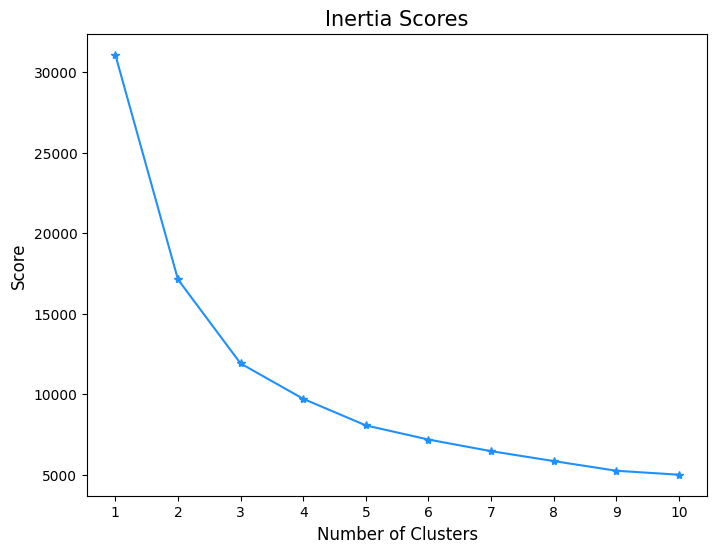

In [9]:
inertia_ly = []

for k in range(1, 11):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(PCA_df)
    inertia_ly.append(km.inertia_)
    
plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), inertia_ly, marker = '*', color = 'dodgerblue')
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.xticks(range(1, 11))
plt.title('Inertia Scores', fontsize = 15);

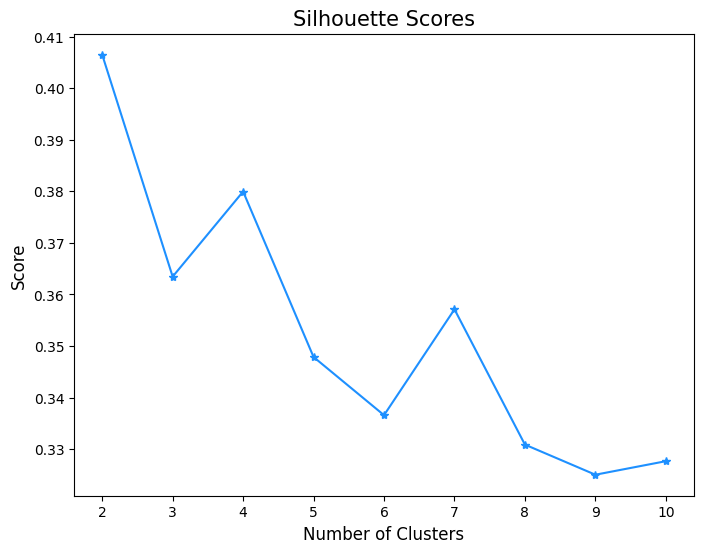

In [10]:
from sklearn.metrics import silhouette_score

sil_ly = []
max_k = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, max_k+1):
    kmeans = KMeans(n_clusters = k).fit(PCA_df)
    labels = kmeans.labels_
    sil_ly.append(silhouette_score(PCA_df, labels, metric = 'euclidean'))
    
plt.figure(figsize = (8, 6))
plt.plot(range(2, 11), sil_ly, marker = '*', color = 'dodgerblue')
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.xticks(range(2, 11))
plt.title('Silhouette Scores', fontsize = 15);

>According to the results above, the optimal k is 4; therefore, I will use k = 4 to make the clustering.

In [11]:
# KMeans (k = 4)
km_4 = KMeans(n_clusters = 4)
y_pred = km_4.fit_predict(PCA_df)
df["label"] = y_pred

#### Rename the label names
- 0 to A
- 1 to B
- 2 to C
- 3 to D

In [12]:
df['label'] = df['label'].replace({0: 'A', 1: 'B', 2: 'C', 3: 'D'})

### Output the result

In [13]:
df.to_csv('../data/labeled_result.csv', index = False)